In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [37]:
data = pd.read_csv('house_price_Dống-Da_Hà-Nội_subdata.csv')
data.head()

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,50.0,14700.0,44197,So do,NaN,NaN,4.0,6.0,6.0,21.015698,105.824583,trong ngo
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo
2,62.0,11000.0,44268,So do,NaN,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo
3,26.0,2900.0,44292,So do,NaN,NaN,4.0,3.0,4.0,21.014325,105.834918,trong ngo
4,40.0,3950.0,44292,So do,NaN,NaN,NaN,NaN,5.0,21.009862,105.838083,trong ngo


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   area               665 non-null    float64
 1   price              617 non-null    float64
 2   postDate           671 non-null    int64  
 3   land_certificate   369 non-null    object 
 4   house_direction    42 non-null     object 
 5   balcony_direction  24 non-null     object 
 6   toilet             240 non-null    float64
 7   bedroom            320 non-null    float64
 8   floor              366 non-null    float64
 9   lat                671 non-null    float64
 10  long               671 non-null    float64
 11  property_type      671 non-null    object 
dtypes: float64(7), int64(1), object(4)
memory usage: 63.0+ KB


In [39]:
data.describe()

,area,price,postDate,toilet,bedroom,floor,lat,long
count,665.000000,6.170000e+02,671.000000,240.000000,320.00000,366.000000,671.000000,671.000000
mean,103.763534,2.892758e+04,44259.903130,3.645833,4.31875,4.762295,21.015733,105.825550
std,471.861867,1.464474e+05,58.280392,2.349126,2.58976,1.676853,0.006517,0.009011
min,0.000000,4.500000e+00,44197.000000,1.000000,1.00000,1.000000,20.998499,105.795544
25%,39.000000,3.950000e+03,44197.000000,2.000000,3.00000,4.000000,21.011094,105.822605
50%,55.000000,8.900000e+03,44292.000000,4.000000,4.00000,5.000000,21.018072,105.828985
75%,80.000000,2.150000e+04,44312.000000,4.250000,6.00000,5.000000,21.018777,105.829949
max,11000.000000,3.300000e+06,44325.000000,16.000000,22.00000,11.000000,21.036845,105.841407


### Phát hiện các dòng, cột chứa dữ liệu khuyết thiếu

In [40]:
#Các cột chứa giá trị khuyết thiếu
print('Các cột chứa dữ liệu khuyết thiếu là:')
for index, column in enumerate(data.columns):
    temp = data.loc[:,column].isnull()
    if temp.sum() > 0:
        print('Cột', data.columns[index], 'chứa' , temp.sum() , 'giá trị KT')
        
#Số lượng dòng chứa giá trị khuyết thiếu
print('Tổng số lượng dòng có chứa giá trị khuyết thiếu là: ', data.shape[0] - data.dropna().shape[0])

#Loại dữ liệu có thể xóa nếu có khuyết thiếu
print("Các cột 'area', 'price' có thể xóa")
print("Bởi vì số lượng khuyết thiếu là thiểu số, và nếu thiếu các dữ liệu này thì dòng đấy sẽ mất đi nhiều ý nghĩa.")

Các cột chứa dữ liệu khuyết thiếu là:
Cột area chứa 6 giá trị KT
Cột price chứa 54 giá trị KT
Cột land_certificate chứa 302 giá trị KT
Cột house_direction chứa 629 giá trị KT
Cột balcony_direction chứa 647 giá trị KT
Cột toilet chứa 431 giá trị KT
Cột bedroom chứa 351 giá trị KT
Cột floor chứa 305 giá trị KT
Tổng số lượng dòng có chứa giá trị khuyết thiếu là:  657
Các cột 'area', 'price' có thể xóa
Bởi vì số lượng khuyết thiếu là thiểu số, và nếu thiếu các dữ liệu này thì dòng đấy sẽ mất đi nhiều ý nghĩa.


### Xóa bỏ hết tất cả những dòng dữ liệu không có thông tin về giá

In [41]:
data.dropna(subset=['price'])

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,50.0,14700.0,44197,So do,NaN,NaN,4.0,6.0,6.0,21.015698,105.824583,trong ngo
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo
2,62.0,11000.0,44268,So do,NaN,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo
3,26.0,2900.0,44292,So do,NaN,NaN,4.0,3.0,4.0,21.014325,105.834918,trong ngo
4,40.0,3950.0,44292,So do,NaN,NaN,NaN,NaN,5.0,21.009862,105.838083,trong ngo
...,...,...,...,...,...,...,...,...,...,...,...,...
666,168.0,23500.0,44325,NaN,NaN,NaN,3.0,3.0,3.0,21.000823,105.829097,mat pho
667,65.0,17500.0,44325,So do,NaN,NaN,NaN,6.0,5.0,21.011495,105.816666,mat pho
668,60.0,17500.0,44197,NaN,NaN,NaN,NaN,NaN,NaN,21.011495,105.816666,mat pho
669,45.0,24800.0,44197,NaN,NaN,NaN,NaN,NaN,NaN,21.016106,105.832157,mat pho


### Thực hiện xử lý giá trị khuyết thiếu: Thay thế giá trị khuyết thiếu của land_certificate bằng =”không có thông tin”, house_direction, balcony_direction, toilet, bedroom, Floor  bằng giá trị có tần số xuất hiện lớn nhất của các thuộc tính đó,

In [42]:
data['land_certificate'].fillna('không có thông tin', inplace = True)

In [43]:
data.tail()

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
666,168.0,23500.0,44325,không có thông tin,NaN,NaN,3.0,3.0,3.0,21.000823,105.829097,mat pho
667,65.0,17500.0,44325,So do,NaN,NaN,NaN,6.0,5.0,21.011495,105.816666,mat pho
668,60.0,17500.0,44197,không có thông tin,NaN,NaN,NaN,NaN,NaN,21.011495,105.816666,mat pho
669,45.0,24800.0,44197,không có thông tin,NaN,NaN,NaN,NaN,NaN,21.016106,105.832157,mat pho
670,107.0,45000.0,44325,So do,NaN,NaN,NaN,NaN,5.0,21.009123,105.824428,mat pho


In [25]:
#data['balcony_direction'].astype(float)

In [44]:
data.loc[:,'balcony_direction'].unique()

array([nan, 'Nam', 'dong-Nam', 'Tay-Bac', 'dong', 'Bac', 'Tay-Nam',
       'dong-Bac'], dtype=object)

In [45]:
data['balcony_direction'].mode()

0    dong-Nam
Name: balcony_direction, dtype: object

In [29]:
#data['balcony_direction'].fillna(data['balcony_direction'].mode(), inplace = True)

In [31]:
#data.tail()

In [46]:
data.fillna({"balcony_direction": data["balcony_direction"].mode()[0], 
          "toilet": data["toilet"].mode()[0],
          "bedroom":data["bedroom"].mode()[0],
          "floor":data["floor"].mode()[0]},inplace=True)

In [47]:
data.tail()

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
666,168.0,23500.0,44325,không có thông tin,NaN,dong-Nam,3.0,3.0,3.0,21.000823,105.829097,mat pho
667,65.0,17500.0,44325,So do,NaN,dong-Nam,4.0,6.0,5.0,21.011495,105.816666,mat pho
668,60.0,17500.0,44197,không có thông tin,NaN,dong-Nam,4.0,3.0,5.0,21.011495,105.816666,mat pho
669,45.0,24800.0,44197,không có thông tin,NaN,dong-Nam,4.0,3.0,5.0,21.016106,105.832157,mat pho
670,107.0,45000.0,44325,So do,NaN,dong-Nam,4.0,3.0,5.0,21.009123,105.824428,mat pho


#### Lọc thông tin những bất động sản ở trong ngõ thành bộ dữ liệu nhà ngõ

In [49]:
data.loc[:,'property_type'].unique()

array(['trong ngo', 'mat pho'], dtype=object)

In [50]:
nhango = data[((data['property_type'] == 'trong ngo'))]
nhango

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,50.0,14700.0,44197,So do,NaN,dong-Nam,4.0,6.0,6.0,21.015698,105.824583,trong ngo
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo
2,62.0,11000.0,44268,So do,NaN,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo
3,26.0,2900.0,44292,So do,NaN,dong-Nam,4.0,3.0,4.0,21.014325,105.834918,trong ngo
4,40.0,3950.0,44292,So do,NaN,dong-Nam,4.0,3.0,5.0,21.009862,105.838083,trong ngo
...,...,...,...,...,...,...,...,...,...,...,...,...
444,90.0,32000.0,44325,không có thông tin,dong-Bac,Tay-Bac,4.0,3.0,8.0,21.017799,105.810572,trong ngo
445,58.0,15800.0,44325,So do,dong-Nam,dong-Nam,4.0,5.0,7.0,21.020556,105.828657,trong ngo
446,96.0,10200.0,44325,So do,NaN,dong-Nam,4.0,3.0,4.0,21.012310,105.828978,trong ngo
447,38.0,3900.0,44325,So do,NaN,dong-Nam,4.0,3.0,5.0,21.006694,105.835635,trong ngo


### Tính toán giá/m2  ( đơn vị triệu/m2) với loại hình nhà ngõ

In [52]:
nhango.loc[:,'giá (triệu/m2)'] = nhango.loc[:,'price']/nhango.loc[:,'area']

C:\Users\PC\AppData\Local\Temp\ipykernel_10628\2591086675.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nhango.loc[:,'giá (triệu/m2)'] = nhango.loc[:,'price']/nhango.loc[:,'area']


In [53]:
nhango

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type,giá (triệu/m2)
0,50.0,14700.0,44197,So do,NaN,dong-Nam,4.0,6.0,6.0,21.015698,105.824583,trong ngo,294.000000
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo,73.684211
2,62.0,11000.0,44268,So do,NaN,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo,177.419355
3,26.0,2900.0,44292,So do,NaN,dong-Nam,4.0,3.0,4.0,21.014325,105.834918,trong ngo,111.538462
4,40.0,3950.0,44292,So do,NaN,dong-Nam,4.0,3.0,5.0,21.009862,105.838083,trong ngo,98.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,90.0,32000.0,44325,không có thông tin,dong-Bac,Tay-Bac,4.0,3.0,8.0,21.017799,105.810572,trong ngo,355.555556
445,58.0,15800.0,44325,So do,dong-Nam,dong-Nam,4.0,5.0,7.0,21.020556,105.828657,trong ngo,272.413793
446,96.0,10200.0,44325,So do,NaN,dong-Nam,4.0,3.0,4.0,21.012310,105.828978,trong ngo,106.250000
447,38.0,3900.0,44325,So do,NaN,dong-Nam,4.0,3.0,5.0,21.006694,105.835635,trong ngo,102.631579


### Phát hiện giá trị ngoại lai của các thuộc tính: diện tích, giá/m2 bằng phương pháp IQR

In [54]:
cols = ['area','price','giá (triệu/m2)']
Q1 = nhango.loc[:,cols].quantile(0.25)
Q3 = nhango.loc[:,cols].quantile(0.75)
IQR = Q3-Q1
nhango1 = nhango[~((nhango.loc[:,cols] < (Q1 - 1.5 * IQR)) | (nhango.loc[:,cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Số giá trị bị bỏ đi là", nhango.shape[0] - nhango1.shape[0])

Số giá trị bị bỏ đi là 63


### Thực hiện loại bỏ các dòng dữ liệu ngoại lai

In [58]:
nhango1

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type,giá (triệu/m2)
0,50.0,14700.0,44197,So do,NaN,dong-Nam,4.0,6.0,6.0,21.015698,105.824583,trong ngo,294.000000
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo,73.684211
2,62.0,11000.0,44268,So do,NaN,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo,177.419355
3,26.0,2900.0,44292,So do,NaN,dong-Nam,4.0,3.0,4.0,21.014325,105.834918,trong ngo,111.538462
4,40.0,3950.0,44292,So do,NaN,dong-Nam,4.0,3.0,5.0,21.009862,105.838083,trong ngo,98.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,25.0,2850.0,44325,không có thông tin,NaN,dong-Nam,3.0,2.0,4.0,21.029522,105.827353,trong ngo,114.000000
445,58.0,15800.0,44325,So do,dong-Nam,dong-Nam,4.0,5.0,7.0,21.020556,105.828657,trong ngo,272.413793
446,96.0,10200.0,44325,So do,NaN,dong-Nam,4.0,3.0,4.0,21.012310,105.828978,trong ngo,106.250000
447,38.0,3900.0,44325,So do,NaN,dong-Nam,4.0,3.0,5.0,21.006694,105.835635,trong ngo,102.631579


#### Chuẩn hóa dữ liệu của tất cả các thuộc tính: price/m2 bằng các phương pháp: min-max scaling, z- score scaling, Robust scaling, và so sánh phân bố của thuộc tính này trước và sau khi chuẩn hóa

,Z-score,MinMax,Robust
mode,6.728786e-01,0.496206,0.628876
mean,3.505248e-16,0.347242,0.099609
median,-1.266371e-01,0.319207,0.000000


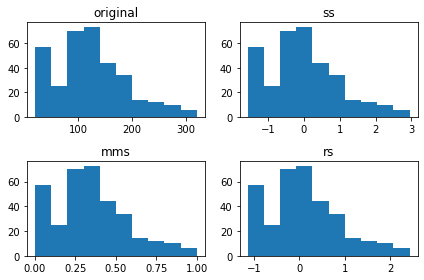

In [63]:
from sklearn import preprocessing as pp
cols = ['giá (triệu/m2)']

ss = pp.StandardScaler()
mms = pp.MinMaxScaler()
rs = pp.RobustScaler()

#Chuẩn hóa
ss_fitted = pd.DataFrame(ss.fit_transform(nhango1.loc[:, cols]), columns=cols, index=nhango1.index)
mms_fitted = pd.DataFrame(mms.fit_transform(nhango1.loc[:, cols]), columns=cols, index=nhango1.index)
rs_fitted = pd.DataFrame(rs.fit_transform(nhango1.loc[:, cols]), columns=cols, index=nhango1.index)

#Xuất giá trị
phuongphap = ['Z-score', 'MinMax', 'Robust']
chuanhoa = [ss_fitted, mms_fitted, rs_fitted]
nhango2 = pd.DataFrame()
for i in range(0,3):
    nhango2.loc['mode',phuongphap[i]]= chuanhoa[i].mode().max().item()
    nhango2.loc['mean',phuongphap[i]]= chuanhoa[i].mean().item()
    nhango2.loc['median',phuongphap[i]]= chuanhoa[i].median().item()
display(nhango2)

# Vẽ đồ thị
fig, axs = plt.subplots(2, 2)
axs[0,0].hist(nhango1.loc[:, cols])
axs[0,0].set_title('original')
axs[0,1].hist(ss_fitted)
axs[0,1].set_title('ss')
axs[1,0].hist(mms_fitted)
axs[1,0].set_title('mms')
axs[1,1].hist(rs_fitted)
axs[1,1].set_title('rs')
fig.tight_layout()